In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

In [3]:
df=pd.read_csv('Iris.csv',encoding='latin-1')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [7]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [8]:
df.columns = df.columns.str.strip()

In [9]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64


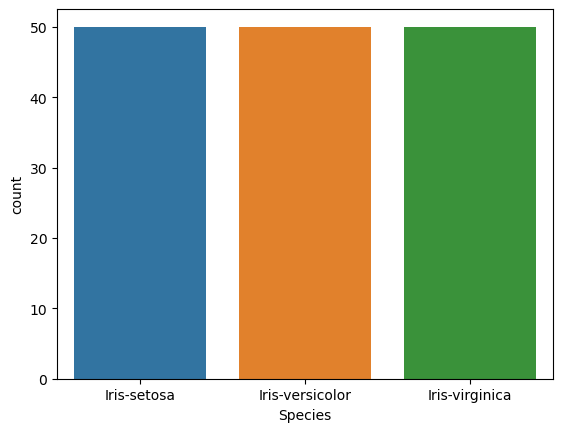

In [20]:
import seaborn as sns

# Get the value counts
print(df['Species'].value_counts())

# Create a count plot
sns.countplot(x='Species', data=df);


In [18]:
x=df.iloc[:,:4]
y=df.iloc[:,4]

In [19]:
x

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm
0,1,5.1,3.5,1.4
1,2,4.9,3.0,1.4
2,3,4.7,3.2,1.3
3,4,4.6,3.1,1.5
4,5,5.0,3.6,1.4
...,...,...,...,...
145,146,6.7,3.0,5.2
146,147,6.3,2.5,5.0
147,148,6.5,3.0,5.2
148,149,6.2,3.4,5.4


In [53]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

In [54]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [55]:
print(y_train[:10])


61     1.5
92     1.2
112    2.1
2      0.2
141    2.3
43     0.6
10     0.2
60     1.0
116    1.8
144    2.5
Name: PetalWidthCm, dtype: float64


In [58]:
print(x_train.shape, x_test.shape)

(112, 4) (38, 4)


In [59]:
print(x_train.shape, y_train.shape)


(112, 4) (112,)


In [65]:
print(y_train[:10])

61     1.5
92     1.2
112    2.1
2      0.2
141    2.3
43     0.6
10     0.2
60     1.0
116    1.8
144    2.5
Name: PetalWidthCm, dtype: float64


In [67]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)

In [68]:
model.fit(x_train, y_train)

LogisticRegression()

In [69]:
y_pred=model.predict(x_test)

In [70]:
y_pred

array([19,  9,  1,  9,  1,  9,  1,  9,  9,  9, 19, 10,  9, 10,  9,  1,  9,
        9,  1,  1, 19,  9,  1,  1, 19,  1,  1,  9, 19,  1, 19,  9,  1, 19,
       19,  9,  1,  9], dtype=int64)

In [71]:
from sklearn.metrics import accuracy_score,confusion_matrix
confusion_matrix(y_test,y_pred)

ValueError: Classification metrics can't handle a mix of continuous and multiclass targets

In [72]:
print(y_pred[:10])  # Inspect predicted values
print(y_test[:10])  # Inspect true values


[19  9  1  9  1  9  1  9  9  9]
114    2.4
62     1.0
33     0.2
107    1.8
7      0.2
100    2.5
40     0.3
86     1.5
76     1.4
71     1.3
Name: PetalWidthCm, dtype: float64


In [73]:
y_pred = y_pred.round().astype(int)


In [75]:
model.fit(x_train, y_train)  # Ensure this step ran successfully before predicting

LogisticRegression()

In [77]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)


In [78]:
y_pred = y_pred.round().astype(int)  # For regression outputs


In [80]:
accuracy = accuracy_score(y_test, y_pred) * 100
print("Accuracy of the model is {:.2f}".format(accuracy))


Accuracy of the model is 18.42
